# Exercise - Logistic Regression with PyTorch

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge)
  * [Modules](#Python-Modules)
* [Training Data](#Trainin-Data)
* [Exercise](#Exercise)
  * [Implement the Model](#Implement-the-Model)
  * [Logistic Regression](#Softmax)
  * [Binary Cross Entropy](#Binary-Cross-Entropy)
  * [Gradient Descent](#Gradient-Descent)
  * [Plot](#Plot)
    * [Cost (Loss) over Iterations](#Cost-(Loss)-over-Iterations)
    * [Decision Boundary After Training](#Decision-Boundary-After-Training)
  * [Using PyTorch Built-Ins](Using-PyTorch-Built-Ins)

* [Literature](#Literature)
* [Licenses](#Licenses)

## Introduction

Teaching objectives of this notebook are:
- Implementing a logistic regression model using PyTorch

In order to detect errors in your own code, execute the notebook cells containing `assert` or `assert_almost_equal`.

## Requirements

### Knowledge

You should posess knowledge about:
- Logistic regression
- Gradient descent
 * Chapter 5 and 6 of the [Deep Learning Book](http://www.deeplearningbook.org/)
 * Chapter 5 of the book Pattern Recognition and Machine Learning by Christopher M. Bishop [BIS07]
 * Video 15.3 and following in the playlist [Machine Learning](https://www.youtube.com/watch?v=-Z2a_mzl9LM&list=PLD0F06AA0D2E8FFBA&t=740s&index=110)
- PyTorch basics:
 - [Tutorial about PyTorch's tensors](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html)
 - [Tutorial about PyTorch's autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)
 - [PyTorch Optimizer](https://pytorch.org/docs/stable/optim.html)
 - [PyTorch nn Module](https://pytorch.org/docs/stable/nn.html)

### Python Modules

In [ ]:
import numpy as np

import scipy.stats
from scipy.stats import norm

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

%matplotlib inline

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(1)

## Training Data

- $m$-Training data $\mathcal D = \{(\vec x^{(1)}, y^{(1)}),(\vec x^{(2)},y^{(2)}), \dots (\vec x^{(m)},y^{(m)})\}$

here with
 - two features $\vec x = (x_1, x_2)^T$
 - two classes: $y \in \{ 0, 1\}$

In [ ]:
# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 100

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([0.5,0.5])
m1 = 100

# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)

def plot_data(r0, r1):
    plt.figure(figsize=(7.,7.))
    plt.scatter(r0[...,0], r0[...,1], c='r', marker='o', label="class 0")
    plt.scatter(r1[...,0], r1[...,1], c='b', marker='o', label="class 1")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

In [ ]:
plot_data(r0, r1)
plt.legend()

In [ ]:
X = np.concatenate((r0, r1), axis=0)
X.shape

In [ ]:
y = np.concatenate((np.zeros(m0), np.ones(m1)))
y.shape

In [ ]:
# shuffle the data
assert X.shape[0] == y.shape[0]
perm = np.random.permutation(np.arange(X.shape[0]))
X = X[perm]
y = y[perm]

## Exercise

Since we have concrete classes and not contiunous values, we have to implement logistic regression (opposed to linear regression). Logistic regression implies the use of the logistic function:

$$
\sigma(z) = \frac{1}{1+ exp(-z)}
$$

with 

$$
z = \vec \theta^T \vec x = \theta_0 \cdot x_0 + \theta_1 \cdot x_1 + \ldots + \theta_n \cdot x_n
$$

and feature $x_0 = 1$ for every training example.

Or visually as graph:



### Implement the Model

**Tasks:**

Implement logistic regression. This can be split into three subtasks:
 1. Implement the LogisticRegression class.
 2. Implement the computation of the cross-entropy loss.
 3. Implement vanilla gradient descent.
 
**Sidenote:**

The logistic function, as well as the tanh, are so called sigmoid functions, because of their "S" shape. Though in the domain of machine learning, the term "sigmoid" function ofter refers to the logistic function.

### Logistic Model

**Task 1:**

Implement Logistic Regression as an `nn.Module`. If you have done the notebook about *linear regression* before, you should already be familiar with `torch.nn.Linear`. Just pipe its output with `torch.nn.Sigmoid`.

Again. Add `torch.nn.Linear` and `torch.nn.Sigmoid` as class members and use them in the forward method.

If you do not want to use PyTorchs built-in functions, you can of course implement the sigmoid function yourself ;-)

**Hint:**

In our case, with two features, the input data has the shape `(m_examples, n_features)`:

        tensor([[-0.6617, -0.0426],
                [-1.3328,  0.5161],
                ....

The forward method should return the probabilities for the positive class $ p(y=1 | x, \theta)$

        tensor([[ 0.7577],
                [ 0.0777], 
                ....

In [ ]:
class LogisticRegression(nn.Module):  # inheriting from nn.Module!

    def __init__(self, num_features):

        super(LogisticRegression, self).__init__()

        ###############################
        ##### YOUR SOLUTION START #####
        ###############################

        raise NotImplementedError()

        ###############################
        ##### YOUR SOLUTION End   #####
        ###############################
    
    def forward(self, x):
        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        # should return the probabilities for the classes, e.g.
        # tensor([[ 0.7577],
        #         [ 0.0777], 
        #         ....

        raise NotImplementedError()

        ###############################
        ##### YOUR SOLUTION End   #####
        ###############################        

In [ ]:
NUM_FEATURES = 2
model = LogisticRegression(NUM_FEATURES)

In [ ]:
### Should output something like:
###
### LogisticRegression(
###   (linear): Linear(in_features=2, out_features=1, bias=True)
###   (sigmoid): Sigmoid()
### )
print(model)

In [ ]:
### Iterate through our trainable parameters
for param in model.parameters():
    print (param)

### Binary Cross-Entropy

**Task 2:**

Implement the computation of the binary cross-entropy loss. Don't use any build-in function of PyTorch for the cross-entropy.


**Reminder:**

\begin{equation}
    J_D(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(-y^i \cdot log(h_\theta (x^i)) - (1-y^i) \cdot log(1-h_\theta(x^i))\right)
\end{equation}

In [ ]:
# method that returns the crossentropy computed with pytorch
# so we can use the grad for gradient descent
def binary_cross_entropy(predictions, targets):
    
    ###############################
    ##### YOUR SOLUTION START #####
    ###############################
    #
    # Task: crossentropy average as pytorch tensor (scalar)

    raise NotImplementedError()

    ###############################
    ##### YOUR SOLUTION End   #####
    ###############################


In [ ]:
model = LogisticRegression(NUM_FEATURES)

### predict some dummy data
preds = model(torch.randn(4,2))

### dummy y
targets = torch.tensor([[0.],[0.],[0.],[1.]])

### calculate costs
costs = binary_cross_entropy(preds, targets)
print(costs)

# costs should be a float >= 0.0
assert costs >= 0.0

### Gradient Descent 

**Task 3:**

Train the model with gradient descent.

- Convert the data to torch tensors.
- Implement the gradient descent _update rule_.
- Apply iteratively the update rule to minimize the loss. 
    - **Hint:** Print the costs every ~100 epochs to get instant feedback about the training success

**Reminder:**

Equation for the _update rule_:

$$
\begin{align}
\theta_j' & = \theta_j - \alpha \cdot  \frac{\partial}{\partial \theta_j} J(\theta)\\\\
\end{align}
$$

In [ ]:
###############################
##### YOUR SOLUTION START #####
###############################
#
# Task: Convert numpy arrays to tensors
#

###############################
##### YOUR SOLUTION End   #####
###############################

In [ ]:
### If your implementation is correct, these tests should not throw and exception

print(X_tensor.shape) ### should be [200,2]
print(y_tensor.shape) ### should be [200,1]

assert X_tensor.shape[0] == 200
assert X_tensor.shape[1] == 2
assert y_tensor.shape[0] == 200
assert X_tensor.dtype == torch.float32
assert y_tensor.dtype == torch.float32

In [ ]:
def update_step(model, loss_function, x_, y_, lr):
    
    ###############################
    ##### YOUR SOLUTION START #####
    ###############################

    raise NotImplementedError()

    ###############################
    ##### YOUR SOLUTION End   #####
    ###############################

In [ ]:
def gradient_descent(data, targets, loss_function, model, lr = 0.5, nb_epochs = 1000):
    
    ###############################
    ##### YOUR SOLUTION START #####
    ###############################

    raise NotImplementedError()

    ###############################
    ##### YOUR SOLUTION End   #####
    ###############################

In [ ]:
nb_epochs = 1000

# new model with untouched parameters
model = LogisticRegression(NUM_FEATURES)

# cost is a numpy array with the cost function value at each iteration.
# will be used below to print the progress during learning
cost = gradient_descent(X_tensor, y_tensor, loss_function=binary_cross_entropy, model=model, lr = 0.1, nb_epochs = nb_epochs)

### Plot

### Cost-(Loss)-over-Iterations

Plot the costs per epoch. Just execute the cells. The output should look similar to the following:

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/klaus/shrinking_costs.png" alt="Internet connection needed"></img>

In [ ]:
plt.plot(range(nb_epochs), cost)
plt.xlabel('# of iterations')
plt.ylabel('cost')
plt.title('Learning Progress')

### Decision-Boundary-After-Training

Plot the data with the decisions. Just execute the cells. The output should look similar to the following:

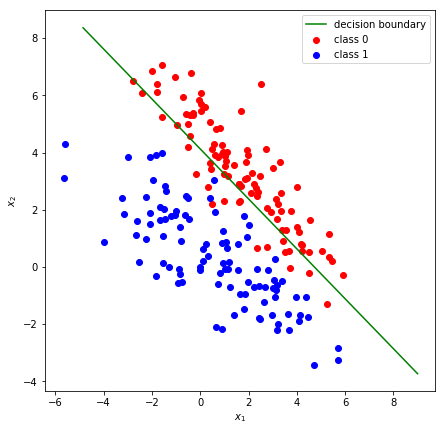

In [ ]:
def plot_decision_boundary(model):    
    plot_data(r0, r1)
    keys = list(model.state_dict().keys())
    param1 = model.state_dict()[keys[0]].detach().numpy()
    param2 = model.state_dict()[keys[1]].detach().numpy()
    x1 = np.linspace(X.min()-1, X.max()+1, 10)
    x2 = ( - param2[0] - param1[0,0] * x1 ) / param1[0,1]
    plt.plot(x1, x2, 'g', label="decision boundary")
    plt.legend()

In [ ]:
plot_decision_boundary(model)

### Using PyTorch Built-Ins

**Task:**

Now create a new model with untrained parameters and this time use PyTorchs built-ins:
- `torch.nn.BCELoss` for the costs function.
- `torch.optim.SGD`, `optim.Adam` or any other optimizer to update your model.


In [ ]:
###############################
##### YOUR SOLUTION START #####
###############################
#
# Task: Create a new model and train with built-in cost and optimizer


###############################
##### YOUR SOLUTION End   #####
###############################

In [ ]:
### your latest model you just trained should be named "model"
### alternatively adjust the method parameter to fit your models variable
plot_decision_boundary(model)

## Literature

<table>
    <tr>
        <td>
            <a name="GOO16"></a>[GOO16]
        </td>
        <td>
            Goodfellow, Ian, et al. Deep learning. Vol. 1. Cambridge: MIT press, 2016.
        </td>
    </tr>
        <tr>
        <td>
            <a name="BIS07"></a>[BIS07]
        </td>
        <td>
            Christopher M. Bishop, Pattern recognition and machine learning, 5th Edition. Springer 2007, ISBN 9780387310732.
        </td>
    </tr>
</table>

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise - Logistic Regression with PyTorch <br/>
by Christian Herta, Klaus Strohmenger<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.